In [1]:
%matplotlib inline

In [132]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# BDD import

https://datacatalog.worldbank.org/search/dataset/0038480w<br>
Use of csv format, flatfiles.

In [20]:
countries = pd.read_csv('src\EdStatsCountry.csv')
countries_series = pd.read_csv('src\EdStatsCountry-Series.csv')
data = pd.read_csv('src\EdStatsData.csv')
foot_note = pd.read_csv('src\EdStatsFootNote.csv')
series = pd.read_csv('src\EdStatsSeries.csv')

## Checking BDD imported & columns selection

### data

The worldbank indicators codes are built as follow:
* Topic (2 digits)
* General Subject (3 digits)
* Specific Subject (4 digits)
* Extensions (2 digits each)

https://datahelpdesk.worldbank.org/knowledgebase/articles/201175-how-does-the-world-bank-code-its-indicators

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 71 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Country Name     886930 non-null  object 
 1   Country Code     886930 non-null  object 
 2   Indicator Name   886930 non-null  object 
 3   Indicator Code   886930 non-null  object 
 4   1970             72288 non-null   float64
 5   1971             35537 non-null   float64
 6   1972             35619 non-null   float64
 7   1973             35545 non-null   float64
 8   1974             35730 non-null   float64
 9   1975             87306 non-null   float64
 10  1976             37483 non-null   float64
 11  1977             37574 non-null   float64
 12  1978             37576 non-null   float64
 13  1979             36809 non-null   float64
 14  1980             89122 non-null   float64
 15  1981             38777 non-null   float64
 16  1982             37511 non-null   floa

**Checking NaN quantity per indicator**

In [54]:
#unique indicators code count
len(data['Indicator Code'].unique())

3665

In [55]:
#unique countries code
len(data['Country Code'].unique())

242

Too much indicators to handle to locate nan values. We ll use indicators group.

In [45]:
#creation of a columns witht he highest code possible to create groups and make the check easiest
data['Indicator Group'] = data.loc[:,'Indicator Code'].apply(lambda x: x.split('.')[0])
data['Indicator Group'].unique()

array(['UIS', 'SE', 'OECD', 'BAR', 'HH', 'LO', 'NY', 'XGDP', 'IT', 'SL',
       'SH', 'SP', 'SABER', 'PRJ'], dtype=object)

We see 2,3,and 4 digits codes. Some indicators do not have 'Topics' nore some have 'General subjects'.<br>
We ll take the code mentionned as the highest level of Indicators group code that we have.

In [137]:
indicators_data = data.loc[:,'1970':'2100'].isna()

#by indicators
indicators_data_heatmap = pd.concat([data['Indicator Group'], indicators_data], axis=1)
indicators_data_heatmap = indicators_data_heatmap.groupby('Indicator Group').mean()

#by countries
countries_data_heatmap = pd.concat([data['Country Code'], indicators_data], axis=1)
countries_data_heatmap = countries_data_heatmap.groupby('Country Code').mean()

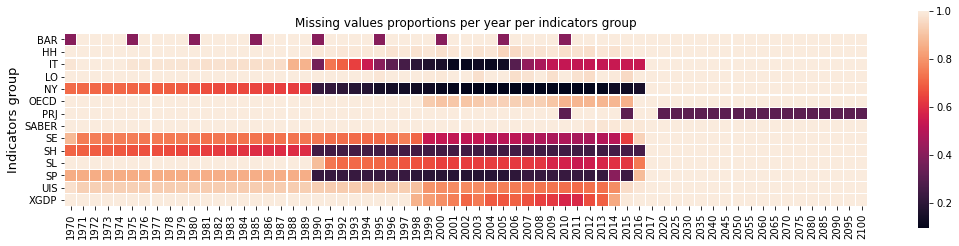

In [138]:
# Heatmap missing values per indicators group
fig = plt.figure(figsize=(18,4))

sns.heatmap(indicators_data_heatmap, square=True, linewidths=0.1)
plt.title("Missing values proportions per year per indicators group")
plt.ylabel('Indicators group', fontsize=13)
plt.show()

In [151]:
countries_data_heatmap[countries_data_heatmap <0.7].notna()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
countries_data_heatmap

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,0.986630,0.986630,0.986630,0.986630,0.986630,0.986630,0.986630,0.986630,0.986630,0.986630,...,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962
AFG,0.857299,0.962074,0.956889,0.935607,0.904229,0.853479,0.955252,0.913233,0.919509,0.966439,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AGO,0.986630,0.974079,0.968895,0.982265,0.984993,0.986630,0.986630,0.986630,0.985812,0.986357,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ALB,0.888404,0.978718,0.979809,0.986357,0.986357,0.888131,0.971351,0.986630,0.963984,0.970259,...,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962
AND,0.988813,0.982810,0.982810,0.982810,0.982810,0.972988,0.982810,0.988813,0.988813,0.988813,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,0.999454,0.999454,0.999454,0.999454,0.999454,0.999454,0.999454,0.999454,0.999454,0.999454,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
YEM,0.888131,0.986357,0.986357,0.986357,0.986357,0.888131,0.986357,0.986357,0.986357,0.986357,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ZAF,0.871487,0.984993,0.984993,0.983902,0.984720,0.885675,0.984720,0.983356,0.983356,0.983356,...,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962,0.915962
